In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [22]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


In [23]:
# Convert labels to one-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


In [24]:
# Build the deep learning model with Batch Normalization
model = models.Sequential()


In [25]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

In [26]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))


In [27]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())


In [28]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))


In [29]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [30]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1039 - accuracy: 0.9692 - val_loss: 0.0547 - val_accuracy: 0.9825
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0440 - accuracy: 0.9863 - val_loss: 0.0469 - val_accuracy: 0.9846
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0327 - accuracy: 0.9894 - val_loss: 0.0333 - val_accuracy: 0.9901
Epoch 4/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0276 - accuracy: 0.9918 - val_loss: 0.0364 - val_accuracy: 0.9879
Epoch 5/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.0290 - val_accuracy: 0.9923
Epoch 6/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0181 - accuracy: 0.9945 - val_loss: 0.0335 - val_accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0334 -

In [31]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 2s 6ms/step - loss: 0.0352 - accuracy: 0.9899
Test accuracy: 0.9898999929428101


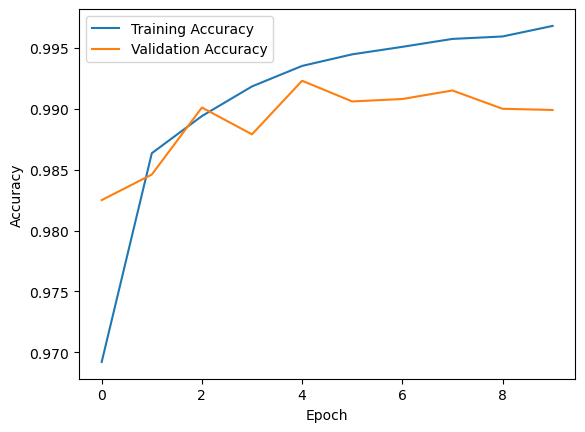

In [32]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# +++++++++=================++++++++++++++++======================

In [33]:
pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [35]:
np.random.seed(42)
X_train = np.random.rand(1000, 20)
y_train = np.random.randint(2, size=(1000,))
X_test = np.random.rand(200, 20)
y_test = np.random.randint(2, size=(200,))

In [36]:
# Define the model building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(X_train.shape[1],)))
# Tune the number of hidden layers and units
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                               activation='relu'))
        
        # Add BatchNormalization for each hidden layer
        model.add(layers.BatchNormalization())
    
    model.add(layers.Dense(1, activation='sigmoid'))  # Adjust based on your problem (binary or multiclass classification)

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',  # Adjust based on your problem
                  metrics=['accuracy'])
    
    return model


In [37]:
# Instantiate the tuner and perform the hyperparameter search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Adjust the number of trials as needed
    directory='my_tuner_dir',  # Specify a directory for storing tuner results
    project_name='my_tuner_project'
)

Reloading Tuner from my_tuner_dir\my_tuner_project\tuner0.json


In [38]:
# Display search space summary
tuner.search_space_summary()


Search space summary
Default search space size: 15
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units_6

In [39]:
# Perform the search
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


In [40]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]


In [41]:
# Evaluate the best model
evaluation_results = best_model.evaluate(X_test, y_test)
print(f'Test accuracy: {evaluation_results[1]}')


7/7 [==============================] - 1s 4ms/step - loss: 0.8290 - accuracy: 0.5700
Test accuracy: 0.5699999928474426


In [42]:
# Visualize the hyperparameter search results
tuner.results_summary()


Results summary
Results in my_tuner_dir\my_tuner_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
num_layers: 13
units_0: 192
units_1: 288
learning_rate: 0.01
units_2: 352
units_3: 288
units_4: 96
units_5: 224
units_6: 512
units_7: 192
units_8: 384
units_9: 224
units_10: 160
units_11: 416
units_12: 32
Score: 0.5699999928474426

Trial 2 summary
Hyperparameters:
num_layers: 10
units_0: 352
units_1: 128
learning_rate: 0.001
units_2: 256
units_3: 128
units_4: 160
units_5: 32
units_6: 288
units_7: 160
units_8: 416
units_9: 256
units_10: 128
units_11: 32
units_12: 320
Score: 0.5350000262260437

Trial 3 summary
Hyperparameters:
num_layers: 13
units_0: 256
units_1: 160
learning_rate: 0.0001
units_2: 96
units_3: 160
units_4: 256
units_5: 64
units_6: 480
units_7: 288
units_8: 512
units_9: 288
units_10: 224
units_11: 512
units_12: 288
Score: 0.5350000262260437

Trial 4 summary
Hyperparameters:
num_layers: 2
units_0: 224
units_1: 160


In [45]:
plt.plot(best_model.history.history['accuracy'], label='Training Accuracy')
plt.plot(best_model.history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

KeyError: 'accuracy'